/home/rkp/anaconda2/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


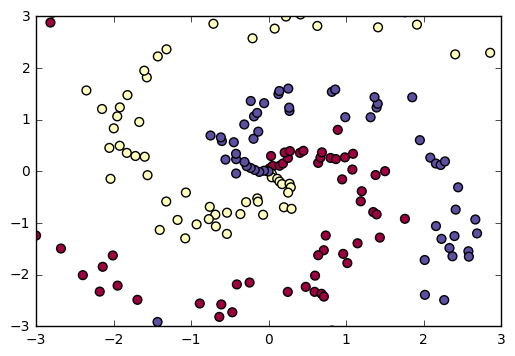

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# generate random sample data
N = 500 # number of samples per class
k = 3 # number of classes
D = 2 # dimensionality
X = np.zeros((N*k,D)) # initialize
y = np.zeros(N*k) # --do--
r = np.linspace(0.0,30.0,N) # fixed radius

np.random.seed(0)

for i in xrange(k):
    ix = range(i*N,N*(i+1))
    t = np.linspace(i*40,(i+1)*40,N)+np.random.randn(N)*0.3 #theta
    X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
    y[ix] = i
fig = plt.figure()
plt.scatter(X[:,0],X[:,1],c=y,s=40,cmap=plt.cm.Spectral)
plt.xlim([-3,3])
plt.ylim([-3,3])
plt.show()

In [12]:
from time import time
from sklearn.cluster import k_means

from elm import ELMClassifier, ELMRegressor, GenELMClassifier, GenELMRegressor
from random_layer import RandomLayer, MLPRandomLayer, RBFRandomLayer, GRBFRandomLayer

In [13]:
model = ELMClassifier()

In [26]:
trainX = np.asarray(list(X[:400])+list(X[500:900])+list(X[1000:1400]))
testX  = np.asarray(list(X[400:500])+list(X[900:1000])+list(X[1400:1500]))
trainY = np.asarray(list(y[:400])+list(y[500:900])+list(y[1000:1400]))
testY  = np.asarray(list(y[400:500])+list(y[900:1000])+list(y[1400:1500]))

In [27]:
print trainX.shape, trainY.shape, testX.shape, testY.shape

(1200, 2) (1200,) (300, 2) (300,)


In [31]:
model.fit(trainX,trainY)

ELMClassifier(activation_args=None, activation_func='tanh', alpha=0.5,
       binarizer=LabelBinarizer(neg_label=-1, pos_label=1, sparse_output=False),
       n_hidden=20, random_state=None, rbf_width=1.0, regressor=None,
       user_components=None)

In [32]:
for i in zip(list(model.predict(testX)), testY):
    print i

(1.0, 0.0)
(1.0, 0.0)
(2.0, 0.0)
(2.0, 0.0)
(1.0, 0.0)
(1.0, 0.0)
(2.0, 0.0)
(0.0, 0.0)
(0.0, 0.0)
(2.0, 0.0)
(2.0, 0.0)
(1.0, 0.0)
(2.0, 0.0)
(1.0, 0.0)
(1.0, 0.0)
(1.0, 0.0)
(1.0, 0.0)
(1.0, 0.0)
(1.0, 0.0)
(0.0, 0.0)
(1.0, 0.0)
(1.0, 0.0)
(1.0, 0.0)
(1.0, 0.0)
(1.0, 0.0)
(0.0, 0.0)
(2.0, 0.0)
(1.0, 0.0)
(0.0, 0.0)
(2.0, 0.0)
(0.0, 0.0)
(0.0, 0.0)
(2.0, 0.0)
(2.0, 0.0)
(2.0, 0.0)
(2.0, 0.0)
(2.0, 0.0)
(2.0, 0.0)
(2.0, 0.0)
(2.0, 0.0)
(2.0, 0.0)
(2.0, 0.0)
(0.0, 0.0)
(2.0, 0.0)
(2.0, 0.0)
(2.0, 0.0)
(2.0, 0.0)
(0.0, 0.0)
(1.0, 0.0)
(2.0, 0.0)
(1.0, 0.0)
(0.0, 0.0)
(0.0, 0.0)
(0.0, 0.0)
(0.0, 0.0)
(0.0, 0.0)
(0.0, 0.0)
(2.0, 0.0)
(2.0, 0.0)
(2.0, 0.0)
(2.0, 0.0)
(2.0, 0.0)
(2.0, 0.0)
(0.0, 0.0)
(0.0, 0.0)
(0.0, 0.0)
(0.0, 0.0)
(0.0, 0.0)
(2.0, 0.0)
(1.0, 0.0)
(0.0, 0.0)
(2.0, 0.0)
(1.0, 0.0)
(1.0, 0.0)
(0.0, 0.0)
(0.0, 0.0)
(0.0, 0.0)
(1.0, 0.0)
(2.0, 0.0)
(0.0, 0.0)
(2.0, 0.0)
(0.0, 0.0)
(0.0, 0.0)
(0.0, 0.0)
(2.0, 0.0)
(1.0, 0.0)
(1.0, 0.0)
(2.0, 0.0)
(2.0, 0.0)
(1.0, 0.0)
(0.0, 0.0)

In [33]:
from sklearn.metrics import classification_report
print classification_report(model.predict(testX), testY)

             precision    recall  f1-score   support

        0.0       0.32      0.32      0.32        99
        1.0       0.27      0.29      0.28        94
        2.0       0.32      0.30      0.31       107

avg / total       0.30      0.30      0.30       300



In [57]:
import keras
from keras.layers import Dense
from keras.models import Sequential

model = Sequential()
model.add(Dense(64, activation='tanh', input_shape=(2,)))
model.add(Dense(3, activation='sigmoid'))

model.compile(optimizer='rmsprop',
          loss='sparse_categorical_crossentropy',
          metrics=['accuracy'])

model.fit(trainX,trainY, validation_data=(testX, testY), epochs=10, batch_size=32)

Train on 1200 samples, validate on 300 samples
Epoch 1/10
1200/1200 [==============================] - 0s - loss: 1.1148 - acc: 0.3317 - val_loss: 1.1170 - val_acc: 0.3200
Epoch 2/10
1200/1200 [==============================] - 0s - loss: 1.1058 - acc: 0.3192 - val_loss: 1.1195 - val_acc: 0.2800
Epoch 3/10
1200/1200 [==============================] - 0s - loss: 1.1023 - acc: 0.3108 - val_loss: 1.1284 - val_acc: 0.2933
Epoch 4/10
1200/1200 [==============================] - 0s - loss: 1.1012 - acc: 0.3367 - val_loss: 1.1331 - val_acc: 0.2733
Epoch 5/10
1200/1200 [==============================] - 0s - loss: 1.1003 - acc: 0.3408 - val_loss: 1.1313 - val_acc: 0.2867
Epoch 6/10
1200/1200 [==============================] - 0s - loss: 1.0988 - acc: 0.3592 - val_loss: 1.1217 - val_acc: 0.3033
Epoch 7/10
1200/1200 [==============================] - 0s - loss: 1.0988 - acc: 0.3550 - val_loss: 1.1292 - val_acc: 0.2833
Epoch 8/10
1200/1200 [==============================] - 0s - loss: 1.0984 - ac

In [58]:
from sklearn.metrics import classification_report
predicted = [list(x).index(max(x)) for x in model.predict(testX)]
print classification_report(predicted, testY)

             precision    recall  f1-score   support

          0       0.30      0.30      0.30        99
          1       0.27      0.31      0.29        87
          2       0.31      0.27      0.29       114

avg / total       0.30      0.29      0.29       300



In [62]:
# checking on the iris dataset
from sklearn.datasets import load_iris
data = load_iris().data
target = load_iris().target
trainX = np.asarray(list(data[:40])+list(data[50:90])+list(data[100:140]))
trainY = np.asarray(list(target[:40])+list(target[50:90])+list(target[100:140]))
testX  = np.asarray(list(data[40:50])+list(data[90:100])+list(data[140:150]))
testY  = np.asarray(list(target[40:50])+list(target[90:100])+list(target[140:150]))

In [64]:
import keras
from keras.layers import Dense
from keras.models import Sequential

model = Sequential()
model.add(Dense(64, activation='tanh', input_shape=(4,)))
model.add(Dense(3, activation='sigmoid'))

model.compile(optimizer='rmsprop',
          loss='sparse_categorical_crossentropy',
          metrics=['accuracy'])

model.fit(trainX,trainY, validation_data=(testX, testY), epochs=10, batch_size=32)

Train on 120 samples, validate on 30 samples
Epoch 1/10
120/120 [==============================] - 0s - loss: 1.0932 - acc: 0.3333 - val_loss: 1.0545 - val_acc: 0.3333
Epoch 2/10
120/120 [==============================] - 0s - loss: 1.0418 - acc: 0.3333 - val_loss: 1.0180 - val_acc: 0.3333
Epoch 3/10
120/120 [==============================] - 0s - loss: 1.0041 - acc: 0.3333 - val_loss: 0.9844 - val_acc: 0.3333
Epoch 4/10
120/120 [==============================] - 0s - loss: 0.9717 - acc: 0.3417 - val_loss: 0.9535 - val_acc: 0.3333
Epoch 5/10
120/120 [==============================] - 0s - loss: 0.9382 - acc: 0.4250 - val_loss: 0.9216 - val_acc: 0.5333
Epoch 6/10
120/120 [==============================] - 0s - loss: 0.9058 - acc: 0.5917 - val_loss: 0.8893 - val_acc: 0.6667
Epoch 7/10
120/120 [==============================] - 0s - loss: 0.8731 - acc: 0.6667 - val_loss: 0.8569 - val_acc: 0.6667
Epoch 8/10
120/120 [==============================] - 0s - loss: 0.8412 - acc: 0.7500 - val_lo

In [65]:
from sklearn.metrics import classification_report
predicted = [list(x).index(max(x)) for x in model.predict(testX)]
print classification_report(predicted, testY)

             precision    recall  f1-score   support

          0       1.00      1.00      1.00        10
          1       1.00      0.56      0.71        18
          2       0.20      1.00      0.33         2

avg / total       0.95      0.73      0.78        30



In [66]:
model = ELMClassifier()
model.fit(trainX,trainY)
from sklearn.metrics import classification_report
print classification_report(model.predict(testX), testY)

             precision    recall  f1-score   support

          0       1.00      1.00      1.00        10
          1       1.00      0.91      0.95        11
          2       0.90      1.00      0.95         9

avg / total       0.97      0.97      0.97        30

